- #!pip3 install tensorflow

- #!pip3 install tensorflow-datasets

# Import Required Libraries

In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm 

# Import Tensorflow libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import Input
from tensorflow.keras.layers import (
    GRU,
    Add,
    AdditiveAttention,
    Attention,
    Concatenate,
    Dense, 
    Embedding,
    LayerNormalization,
    Reshape,
    StringLookup,
    TextVectorization
)

print(tf.version.VERSION)

2.18.0


# Read and Prepare Datasets

We will use the TensorFlow datasets capability to read the COCO captions dataset. This version contains images, bounding boxes, labels, and captions from COCO 2014, split into the subsets defined by Karpathy and Li (2015) and takes care of some data quality issues with the original dataset (for example, some of the images in the original dataset did not have captions)


First, let's define some constants.
Here, we will use a pretrained InceptionResNetV2 model from tf.keras.applications as a feature extractor, so some constants are comming from the InceptionResNetV2 model definition.

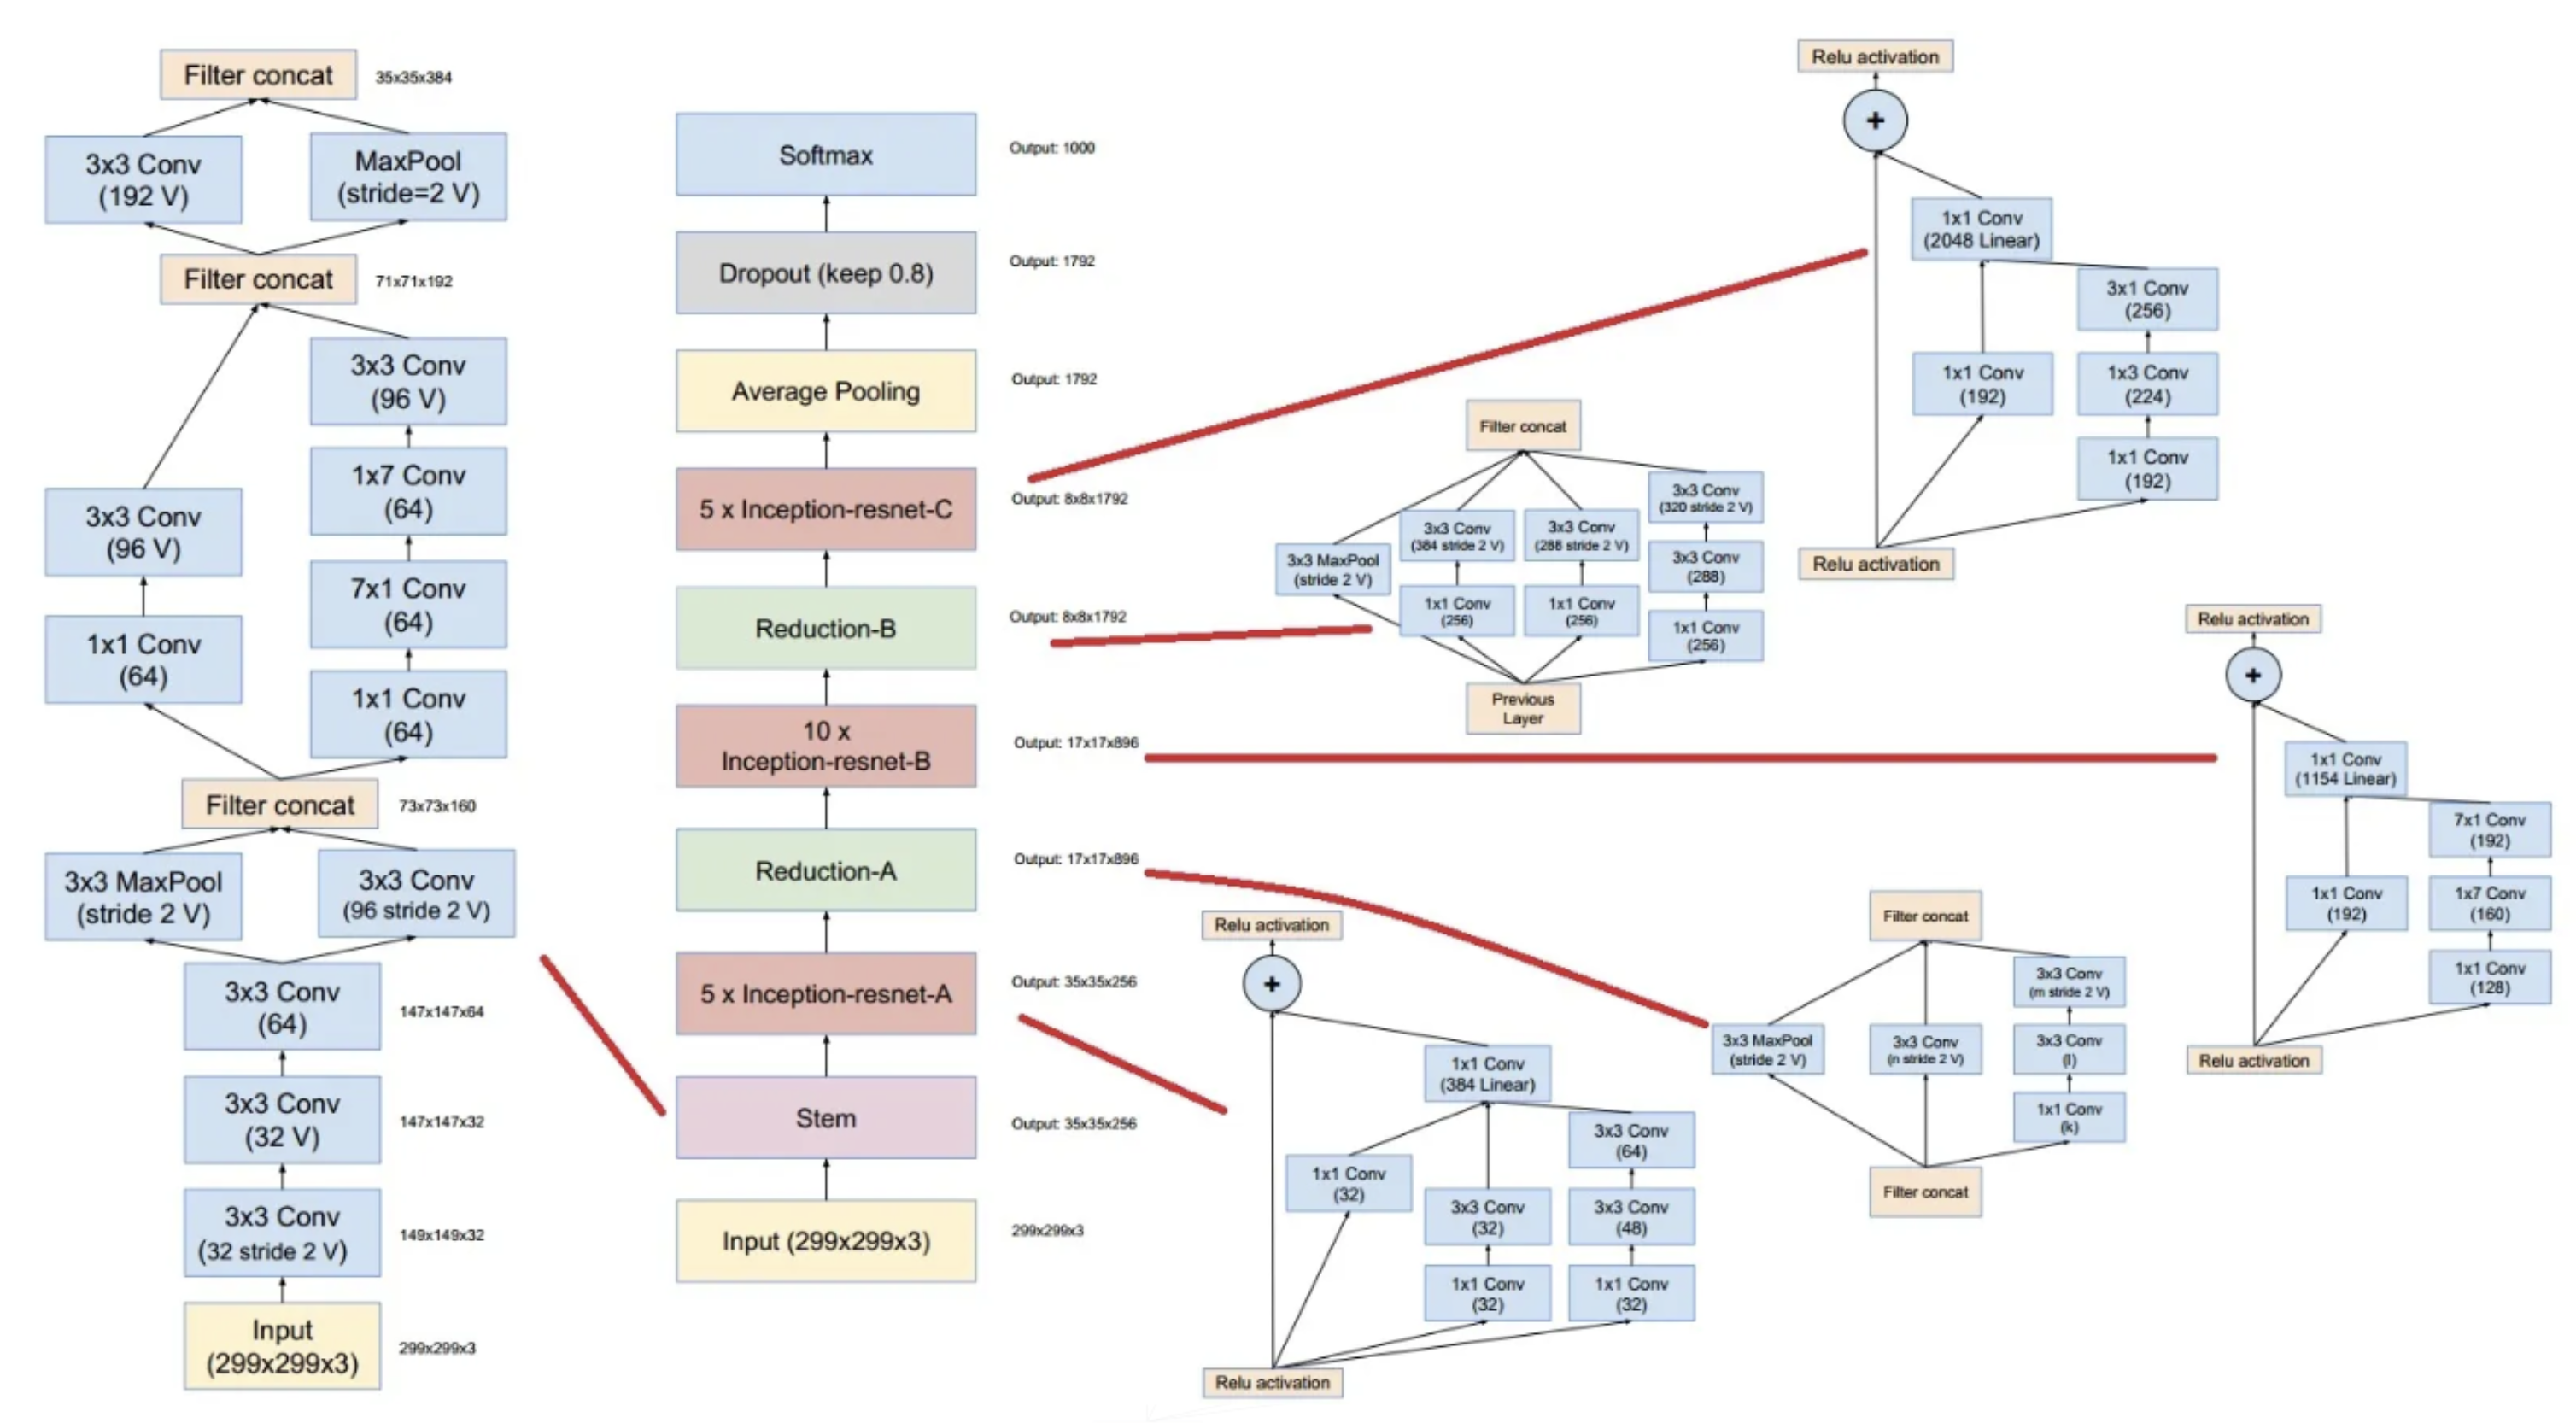

In [5]:
# InceptionResNetV2 takes (299, 299, 3) image as input
# and returns features in (8, 8, 1536) - Basically this tells us Width & Height - 8 and Total No. of different kernels are 1536
feature_extractor = tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = "imagenet"
)
IMG_HEIGHT = 299
IMG_WIDTH = 299
IMG_CHANNELS = 3
FEATURE_SHAPE = (8, 8, 1536)

### 1. FILTER AND PREPROCESS

Here we preprocess the dataset. The function below

* resize image to (IMG_HEIGHT, IMG_WIDTH) shape
* rescale pixel values from [0, 255] to [0,1]
* return image (image tensor) and (captions) dictionary


The dataset we are going to use hosted in GCS bucket, as it large to store in the local system

In [6]:
GCS_DIR = "gs://asl-public/data/tensorflow_datasets/" # this web point refers to the google cloud storage location
BUFFER_SIZE = 1000

def get_image_label(img_dict):
    caption = img_dict["caption"]["text"][0] # we are extracting only the first caption of the image
    img = img_dict["image"]

    # Resize image 
    img = tf.image.resize(img, (IMG_HEIGHT, IMG_WIDTH)) 

    # Rescaling Image
    img = img/255

    return {"image_tensor": img, "caption": caption}

In [7]:
# Load train dataset from the GCS location
train_dataset = tfds.load("coco_options", split="train", data_dir=GCS_DIR)

2025-01-29 19:13:02.335687: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


NotFoundError: Could not find directory gs://asl-public/data/tensorflow_datasets/coco_options